In [1]:
import os
import mujoco
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import math

l1 = 0.020
l2 = 0.027
l3 = 0.020
l4 = 0.022

l1_2 = l1/2
l2_2 = l2/2
l3_2 = l3/2
l4_2 = l4/2

d = 666.666

mb = 0.05
m1 = (l1*0.02*0.002)*d
m2 = (l2*0.02*0.002)*d
m3 = (l3*0.02*0.002)*d
m4 = (l4*0.02*0.002)*d
mt = (0.05*0.01*0.001)*d
print(mb+m1+m2+m3+m4+mt)

jk = 0
jd = 0
fp = l2*2
ts = 1e-6

b_fit = 1.404e-6
kp_fit = 8.896
print(f"{m1},{m2},{m3},{m4}")
xml = f"""
<mujoco>
    <option>
        <flag gravity="enable" contact="enable" />
    </option>
    <option gravity="0 0 -9.81"/>
    <option solver="PGS" timestep="{ts}" />
    <compiler angle="degree" />
    <visual>
        <global offwidth="800" offheight="600" />
    </visual>
    <default>
        <geom contype="1" conaffinity="2" condim="3" friction="0.15 0.08 0.08" solimp=".9 .95 .001" solref=".02 1" margin="0.001" group="0"/>
    </default>

    <worldbody>
        <light name="top" pos="0 0 1"/>
        <camera name="fixed_camera" pos="0 -.5 .06" axisangle="1 0 0 90"/>
        <body name="floor" pos="0 0 0">
            <geom name="floor" pos="0 0 0" size="1 1 0.05" type="plane" rgba="1 .83 .61 .5" contype="2" conaffinity="1"/>
        </body>
        <body name = "main_body" pos = "0 0 0.057" axisangle = "0 1 0 0">
            <joint type="slide" axis="0 0 1"/>
            <joint type="hinge" axis="0 1 0"/>
            <joint type="slide" axis="1 0 0"/>
            <geom name = "main_body" pos = "0 0 0" type = "box" size = "0.05 0.04 0.005" rgba = "0 1 1 0.1" mass = "{mb}" />
            <body name = "leg_link1r" pos = "0 -0.05 0" axisangle = "0 1 0 0">
                <joint name = "J1r" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                <geom pos= "{l1_2} 0 0" size = "{l1_2} .010 .001" type= "box" rgba="1 0 0 1" mass = "{m1}"/>
                <body name = "leg_link2r" pos = "{l1} 0 0" axisangle = "0 1 0 90">
                    <joint name = "J2r" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                    <geom pos = "{l2} 0 0" size = "{l2} 0.010 .001" type = "box" rgba = "0 1 0 1" mass = "{m2}"/>
                    <body name = "footr" pos = "{l2*2} 0 0" axisangle = "0 1 0 -90">
                        <geom pos = "{l2_2} 0 0" size = "{l2_2} 0.010 .001" type = "box" rgba = "0 1 0 1" mass = "{m2}"/>
                        <body name = "leg_sensorr" pos = "{l2} 0 0">
                            <geom type="sphere" size=".002" pos="0 0 0" rgba="0 0 1 1" mass="0.0001" contype="3" conaffinity="4"/>
                        </body>
                    </body>
                </body>
                <body name = "leg_link3r" pos = "0 0 0" axisangle = "0 1 0 90">
                    <joint name = "J3r" type = "hinge" axis = "0 -1 0" stiffness = "{jk}" damping = "{jd}"  pos = "0 0 0" />
                    <geom type = "box" pos = "{l3_2} 0 0" size = "{l3_2} 0.010 0.001" mass = "{m3}" rgba = "0 0 1 1" />
                    <body name = "leg_link4r" pos = "{l3} 0 0" axisangle = "0 1 0 -90">
                        <joint name = "J4r" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                        <geom type = "box" pos = "{l4_2} 0 0" size = "{l4_2} 0.010 0.001" mass = "{m4}" rgba = "1 0 1 1"/>
                        <body name = "leg_link2r2" pos = "{l4} 0 0" axisangle = "0 1 0 -90">
                            <joint name = "J4r2" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                            <geom type = "box" pos = "{l2_2} 0 0.001" size = "{l2_2} 0.010 0.001" mass = "0.0001" rgba = "0 1 1 1"/>
                        </body>
                    </body>
                </body>
            </body>
            <body name = "leg_link1l" pos = "0 0.04 0" axisangle = "0 1 0 0">
                <joint name = "J1l" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                <geom pos= "{l1_2} 0 0" size = "{l1_2} .010 .001" type= "box" rgba="1 0 0 1" mass = "{m1}"/>
                <body name = "leg_link2l" pos = "{l1} 0 0" axisangle = "0 1 0 90">
                    <joint name = "J2l" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                    <geom pos = "{l2} 0 0" size = "{l2} 0.010 .001" type = "box" rgba = "0 1 0 1" mass = "{m2}"/>
                    <body name = "footl" pos = "{l2*2} 0 0" axisangle = "0 1 0 -90">
                        <geom pos = "{l2_2} 0 0" size = "{l2_2} 0.010 .001" type = "box" rgba = "0 1 0 1" mass = "{m2}"/>
                        <body name = "leg_sensorl" pos = "{l2} 0 0.001">
                            <geom type="sphere" size=".002" pos="0 0 0" rgba="0 0 1 1" mass="0.0001" contype="3" conaffinity="4"/>
                        </body>
                    </body>
                </body>
                <body name = "leg_link3l" pos = "0 0 0" axisangle = "0 1 0 90">
                    <joint name = "J3l" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}"  pos = "0 0 0" />
                    <geom type = "box" pos = "{l3_2} 0 0" size = "{l3_2} 0.010 0.001" mass = "{m3}" rgba = "0 0 1 1" />
                    <body name = "leg_link4l" pos = "{l3} 0 0" axisangle = "0 1 0 -90">
                        <joint name = "J4l" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                        <geom type = "box" pos = "{l4_2} 0 0" size = "{l4_2} 0.010 0.001" mass = "{m4}" rgba = "1 0 1 1"/>
                        <body name = "leg_link2l2" pos = "{l4} 0 0" axisangle = "0 1 0 -90">
                            <joint name = "J4l2" type = "hinge" axis = "0 1 0" stiffness = "{jk}" damping = "{jd}" pos = "0 0 0" />
                            <geom type = "box" pos = "{l2_2} 0 0" size = "{l2_2} 0.010 0.001" mass = "0.0001" rgba = "0 1 1 1"/>
                        </body>
                    </body>
                </body>
            </body>
            <body name="tail" pos = "-0.05 0 0" axisangle="0 1 0 -30">
                <joint name = "Jt" type = "hinge" axis = "0 1 0" stiffness = "0.1" damping = "0.0001" pos = "0 0 0" />
                <geom pos = "-0.04 0 0" type = "box" size = "0.04 0.01 0.001" rgba = "0 1 1 0.1" mass = "{mt}"/>
            </body>
        </body>
    </worldbody>
<actuator>
    <motor name = "servo1r" joint = "J1r"/>
    <motor name = "servo2r" joint = "J3r"/>
    <motor name = "servo1l" joint = "J1l"/>
    <motor name = "servo2l" joint = "J3l"/>
</actuator>

<equality>
    <weld name="weld1" active="true" body1="leg_link2r" body2="leg_link2r2"
    anchor="{l2_2} 0 0" relpose="{l2_2} 0 0 0 1 0 180" solimp="0.99 0.99 0.00001" solref="0.00001 1"/>
    <weld name="weld2" active="true" body1="leg_link2l" body2="leg_link2l2"
    anchor="{l2_2} 0 0" relpose="{l2_2} 0 0 0 1 0 180" solimp="0.99 0.99 0.00001" solref="0.00001 1"/>
</equality>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)
print(data.qpos.shape)

Vnom = 6
R = Vnom/0.6
G = 55.5
t_stall = 15/100/G
i_stall = 0.6
i_nl = 0.2
O_nl = 0.66*1000*2*math.pi/180*G
kt = t_stall/i_stall
b_calc = kt*i_nl/O_nl

V_control = 5
b_fit = 1.404e-6
kp_fit = 8.896*2
ke = kt

mujoco.mj_resetData(model,data)
duration = 2
framerate = 100
frames = []
data_rate = 100
width = 600
height = 400
x = []
q = []
w = []
t = []

0.052706663960000004
0.0005333328000000001,0.0007199992800000001,0.0005333328000000001,0.00058666608
(14,)


In [2]:
def run_sim(render=False):
    model = mujoco.MjModel.from_xml_string(xml)
    data = mujoco.MjData(model)
    renderer = mujoco.Renderer(model,width=width, height=height)
    dof = 3
    q1 = 0 + dof
    q2 = 2 + dof
    q3 = 5 + dof
    q4 = 7 + dof
    def my_controller(model, data):
        w = [data.qvel[q1], data.qvel[q2],data.qvel[q3], data.qvel[q4]]
        actual = [data.qpos[q1], data.qpos[q2],data.qpos[q3], data.qpos[q4]]
        
        # Define different desired angles for each joint
        if data.time < 1:
            desired = [math.pi * -40 / 180, math.pi * 0 / 180, math.pi * -40 / 180, math.pi * 0 / 180]  # Desired angles for joint 0 and joint 2
        else:
            desired = [math.pi * 40 / 180, math.pi * 80 / 180, math.pi * 40 / 180, math.pi * -80 / 180]  # Desired angles after 1 second
        
        torques = []
        for i in range(4):
            error = desired[i] - actual[i]
            V = kp_fit * error
            if V > V_control: V = V_control
            if V < -V_control: V = -V_control
            torque = (kt * (V - (ke) * w[i] * G) / R - b_fit * w[i] * G) * G
            torques.append(torque)
        
        data.ctrl[0] = torques[0]
        data.ctrl[1] = torques[1]
        data.ctrl[2] = torques[2]
        data.ctrl[3] = torques[3]
        return

    try:
        mujoco.set_mjcb_control(my_controller)
        duration = 2

        frames = []
        t = []
        xy = []

        mujoco.mj_resetData(model,data)

        while data.time<duration:
            mujoco.mj_step(model,data)

            if render:
                if len(frames)<data.time*framerate:
                    renderer.update_scene(data,camera="fixed_camera")
                    pixles = renderer.render()
                    frames.append(pixles)
            if len(xy)<data.time*data_rate:
                t.append(data.time)
                xy.append(data.xpos.copy())

        if render:
            media.show_video(frames,fps = framerate, width=width, height = height)
        t = np.array(t)
        xy = np.array(xy)
    finally:
        mujoco.set_mjcb_control(None)

    return t,xy,frames

In [3]:
t,xy,frames = run_sim(render=True)

(201, 18, 3)


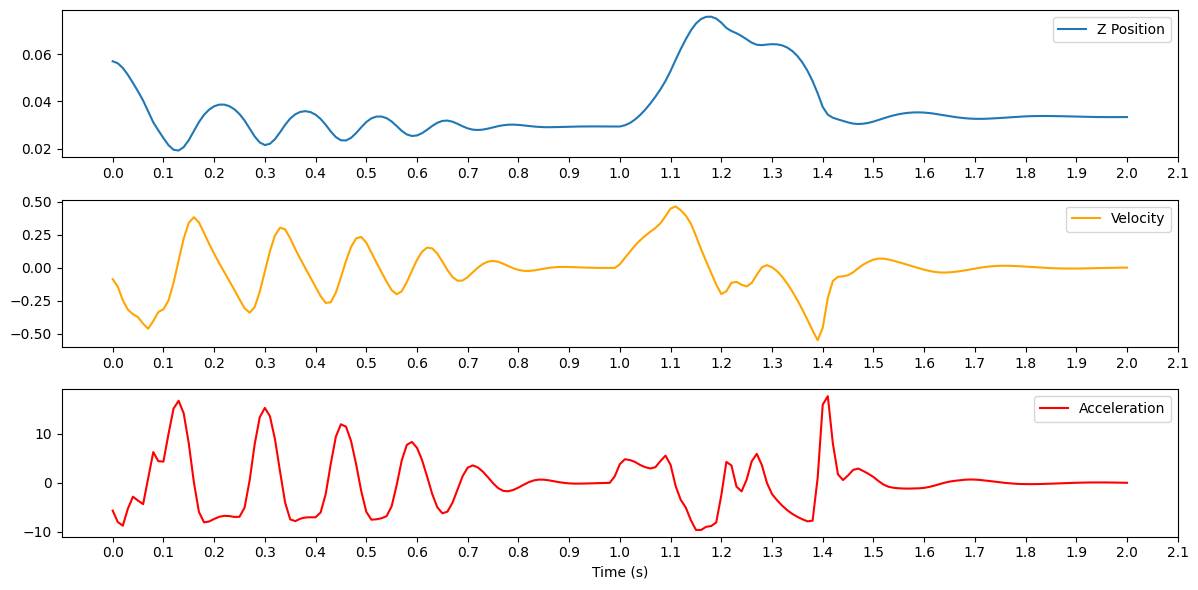

In [4]:
print(xy.shape)

z_position = xy[:,2, 2]
velocity = np.gradient(z_position, t)
acceleration = np.gradient(velocity, t)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, z_position, label='Z Position')
plt.legend()
plt.xticks(np.arange(0, t[-1] + 0.1, 0.1))

plt.subplot(3, 1, 2)
plt.plot(t, velocity, label='Velocity', color='orange')
plt.legend()
plt.xticks(np.arange(0, t[-1] + 0.1, 0.1))

plt.subplot(3, 1, 3)
plt.plot(t, acceleration, label='Acceleration', color='red')
plt.legend()
plt.xticks(np.arange(0, t[-1] + 0.1, 0.1))

plt.xlabel('Time (s)')
plt.tight_layout()

plt.show()



In [5]:
data = np.column_stack((t, z_position, velocity, acceleration))

header = "Time (s)\tZ Position (m)\tVelocity (m/s)\tAcceleration (m/s^2)"

np.savetxt('simulation_data_body.txt', data, header=header, comments='', delimiter='\t', fmt='%.6f')

print("Data successfully exported to 'simulation_data.txt'.")


Data successfully exported to 'simulation_data.txt'.


0.041939134611189116


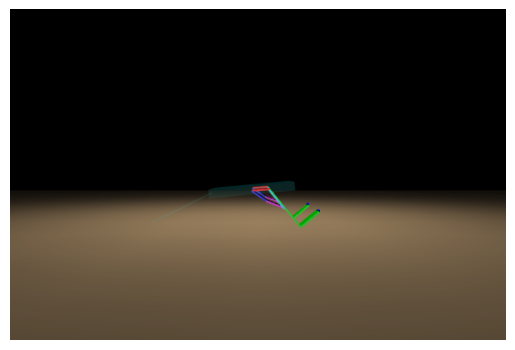

In [6]:
p = 109-2
plt.imshow(frames[p])
plt.axis('off')
print(xy[p,2,2])
start_frame = 100  # For example, starting from frame 100
end_frame = 134    # Up to frame 200

subset_frames = frames[start_frame:end_frame]

media.show_video(subset_frames, fps=framerate, width=width, height=height)